In [24]:
# import library such as pandas, seaborn, sklearn etc..
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker
import os
import random
import folium
from folium import plugins
import plotly.express as px
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

In [25]:
# import data from csv to dataframe using pandas
df = pd.read_csv('Crime_Data_Clean.csv')
df.columns = df.columns.str.replace(' ','')
df

IncidentID  OffenceCode   CRNumber DispatchDate/Time NIBRSCode  \
0        201202980       3550.0  180042096   8/23/2018 21:52       35B   
1        201181293       3522.0  180015424    3/30/2018 1:00       35A   
2        201181293       3562.0  180015424    3/30/2018 1:00       35A   
3        201193163       3520.0  180029476   6/14/2018 22:26       35A   
4        201204355       2204.0  180043926    9/3/2018 12:06       220   
...            ...          ...        ...               ...       ...   
202315   201201247       2901.0  180039929   8/11/2018 12:48       290   
202316   201194674       3562.0  180031899   6/28/2018 17:29       35A   
202317   201197878       2404.0  180035758   7/19/2018 14:26       240   
202318   201198555       1306.0  180036742   7/24/2018 20:27       13A   
202319   201191403       1399.0  180027963    6/6/2018 21:20       13B   

        Victims              CrimeName1  \
0             1   Crime Against Society   
1             1   Crime Against Society   
2             1   Crime Against Society   
3             1   Crime Against Society   
4             1  Crime Against Property   
...         ...                     ...   
202315        1  Crime Against Property   
202316        1   Crime Against Society   
202317        1  Crime Against Property   
202318        1    Crime Against Person   
202319        2    Crime Against Person   

                                      CrimeName2  \
0                      Drug Equipment Violations   
1                       Drug/Narcotic Violations   
2                       Drug/Narcotic Violations   
3                       Drug/Narcotic Violations   
4                 Burglary/Breaking and Entering   
...                                          ...   
202315  Destruction/Damage/Vandalism of Property   
202316                  Drug/Narcotic Violations   
202317                       Motor Vehicle Theft   
202318                        Aggravated Assault   
202319                            Simple Assault   

                                          CrimeName3  PoliceDistrictName  ...  \
0                   DRUGS - NARCOTIC EQUIP - POSSESS          GERMANTOWN  ...   
1              DRUGS - OPIUM OR DERIVATIVE - POSSESS            BETHESDA  ...   
2                        DRUGS - MARIJUANA - POSSESS            BETHESDA  ...   
3                 DRUGS - OPIUM OR DERIVATIVE - SELL  MONTGOMERY VILLAGE  ...   
4             BURGLARY - NO FORCED ENTRY-RESIDENTIAL            BETHESDA  ...   
...                                              ...                 ...  ...   
202315                    DAMAGE PROPERTY - BUSINESS             WHEATON  ...   
202316                   DRUGS - MARIJUANA - POSSESS       SILVER SPRING  ...   
202317                    AUTO THEFT - VEHICLE THEFT       SILVER SPRING  ...   
202318  ASSAULT - AGGRAVATED - NON-FAMILY-STRONG-ARM          GERMANTOWN  ...   
202319                          ASSAULT - 2ND DEGREE  MONTGOMERY VILLAGE  ...   

            StreetName StreetSuffix  StreetType  Start_Date_Time  \
0          MIDDLEBROOK          NaN          RD  8/23/2018 21:52   
1             WOODMONT          NaN         AVE   3/30/2018 1:01   
2             WOODMONT          NaN         AVE   3/30/2018 1:01   
3       QUINCE ORCHARD          NaN          RD  6/14/2018 22:26   
4             FALSTONE          NaN         AVE   9/2/2018 23:30   
...                ...          ...         ...              ...   
202315        SHIPPERS          NaN          LA   8/12/2018 6:53   
202316          SPRING          NaN          ST  6/28/2018 17:29   
202317      AUTOMOBILE          NaN         BLV   6/22/2018 0:00   
202318      GREAT PARK          NaN         CIR  7/24/2018 20:27   
202319        STEDWICK          NaN          RD   6/6/2018 21:21   

          End_Date_Time   Latitude  Longitude  PoliceDistrictNumber  \
0                   NaN  39.177744 -77.265619                    5D   
1                   NaN  38.992693 -77.097063

In [26]:
# Generate Year column based on Start Date Time Column
df['Start_Date_Time'] = pd.to_datetime(df['Start_Date_Time'])
df['Year'] = df['Start_Date_Time'].dt.year

In [27]:
# Group by Crime Type and Year
data2=df[['Year','CrimeName1']]
data2['count']=1
data2a=data2.groupby(['Year','CrimeName1'],as_index=False).sum()
data2a

Year              CrimeName1  count
0   2016    Crime Against Person   2461
1   2016  Crime Against Property  12414
2   2016   Crime Against Society   7811
3   2016             Not a Crime    340
4   2016                   Other   5156
5   2017    Crime Against Person   4899
6   2017  Crime Against Property  24146
7   2017   Crime Against Society  15840
8   2017             Not a Crime    683
9   2017                   Other  10498
10  2018    Crime Against Person   2747
11  2018  Crime Against Property  11691
12  2018   Crime Against Society   8961
13  2018             Not a Crime    625
14  2018                   Other  10958
15  2019    Crime Against Person    147
16  2019  Crime Against Property    264
17  2019   Crime Against Society    184
18  2019             Not a Crime    639
19  2019                   Other  10529
20  2020    Crime Against Person    373
21  2020  Crime Against Property    721
22  2020   Crime Against Society    316
23  2020             Not a Crime    514
24  2020                   Other   9669
25  2021    Crime Against Person   3599
26  2021  Crime Against Property  15332
27  2021   Crime Against Society   3707
28  2021             Not a Crime    395
29  2021                   Other   9518
30  2022    Crime Against Person   3240
31  2022  Crime Against Property  13473
32  2022   Crime Against Society   3785
33  2022             Not a Crime    379
34  2022                   Other   6306

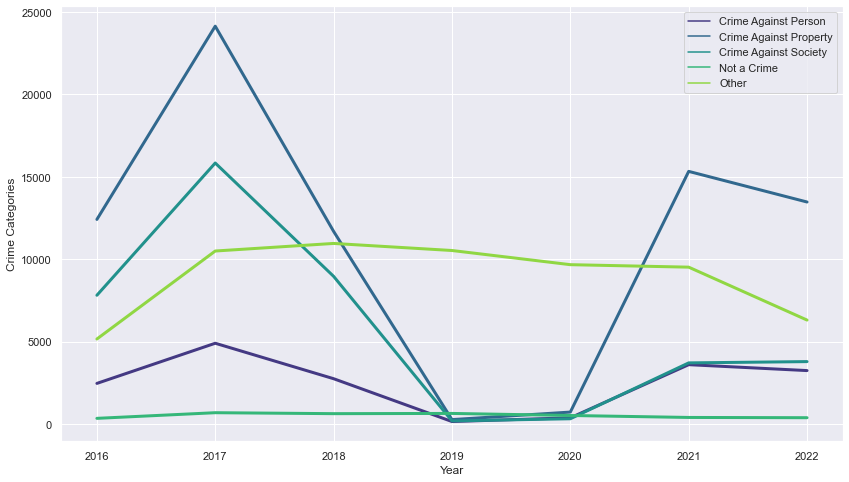

In [28]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(14,8)})

ax = sns.lineplot(data=data2a, x ='Year', y = 'count',
                  hue='CrimeName1', palette='viridis',
                  legend='full', lw=3)

ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
plt.legend(bbox_to_anchor=(1, 1))
plt.ylabel('Crime Categories')
plt.xlabel('Year')
plt.show()

In [29]:
# Plot Crime category count based on year
import plotly.graph_objects as go

#extract color palette, the palette can be changed
pal = list(sns.color_palette(palette='viridis', n_colors=len(Names)).as_hex())

fig = go.Figure()
for d,p in zip(Names, pal):
    fig.add_trace(go.Scatter(x = data2a[data2a['CrimeName1']==d]['Year'],
                             y = data2a[data2a['CrimeName1']==d]['count'],
                             name = d,
                             line_color = p, 
                             fill='tozeroy'))

fig.show()

In [22]:
# Get list of Latitude and Longitude
data1=df[['Latitude','Longitude']]
N=list(range(len(data1)-1))

In [30]:
# Generate Crime Heat map based on location
eq_map = folium.Map(location=[39.14,-77.2],tiles='Stamen Terrain',zoom_start=16.0,min_zoom=2.0)
for index, row in data1.iterrows():
    folium.CircleMarker
eq_map.add_child(plugins.HeatMap(data1.loc[N]))
eq_map